In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from math import exp
%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")
df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,a007_20_30.wav,0.694817,0.026579,1364.705872,1986.209262,3164.231756,0.035301,-346.429700,108.161049,-5.010263,...,6.863027,6.082835,5.599839,-0.544139,6.447171,0.107353,5.729503,-1.870822,4.570478,beach
1,a014-01-01-10_20.wav,0.741687,0.004577,2277.800541,2388.947673,4858.834888,0.077501,-431.045631,81.188404,-19.983681,...,10.371519,7.141554,9.786800,1.239608,11.921585,0.034888,10.066216,0.181321,8.607600,beach
2,a014-01-01-160_170.wav,0.703664,0.004202,1986.967460,2302.645593,4531.140505,0.061005,-440.421508,98.375570,-15.480723,...,8.353411,6.055960,9.052861,-1.327068,11.732653,-0.996032,8.226508,-1.967133,6.456439,beach
3,a014_10_20.wav,0.741687,0.004577,2277.800541,2388.947673,4858.834888,0.077501,-431.045631,81.188404,-19.983681,...,10.371519,7.141554,9.786800,1.239608,11.921585,0.034888,10.066216,0.181321,8.607600,beach
4,a014_160_170.wav,0.703664,0.004202,1986.967460,2302.645593,4531.140505,0.061005,-440.421508,98.375570,-15.480723,...,8.353411,6.055960,9.052861,-1.327068,11.732653,-0.996032,8.226508,-1.967133,6.456439,beach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,b080_230_240.wav,0.676963,0.023915,543.433591,1233.746387,854.258640,0.009455,-446.038179,153.492218,20.883363,...,6.672186,6.831222,4.779959,7.602420,6.226053,2.660712,6.497305,3.466823,2.035949,train
454,b080_70_80.wav,0.698333,0.009261,916.326536,1685.433949,2106.057180,0.016651,-498.202518,131.963493,10.048664,...,9.516545,4.511502,1.688769,5.987603,5.582666,1.470358,6.094954,3.358815,2.782658,train
455,b081_60_70.wav,0.642148,0.018072,413.187066,1035.251989,487.719557,0.009677,-485.080298,153.050519,49.754319,...,9.739163,1.176961,2.904940,4.925119,3.948491,-0.419488,1.240834,4.079452,0.316613,train
456,b082_100_110.wav,0.613859,0.016918,701.996439,1387.200758,1347.873597,0.016027,-438.633688,139.134855,26.555195,...,7.685189,3.726377,3.518736,5.552012,2.799363,-1.472964,3.027280,3.651370,0.262000,train


In [3]:
# encoding the y value from string to integer class level that is "label column" 
gen_list=df.iloc[:, 26].values
encoder = LabelEncoder()
df['label']=encoder.fit_transform(gen_list)
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,a007_20_30.wav,0.694817,0.026579,1364.705872,1986.209262,3164.231756,0.035301,-346.429700,108.161049,-5.010263,...,6.863027,6.082835,5.599839,-0.544139,6.447171,0.107353,5.729503,-1.870822,4.570478,277
1,a014-01-01-10_20.wav,0.741687,0.004577,2277.800541,2388.947673,4858.834888,0.077501,-431.045631,81.188404,-19.983681,...,10.371519,7.141554,9.786800,1.239608,11.921585,0.034888,10.066216,0.181321,8.607600,435
2,a014-01-01-160_170.wav,0.703664,0.004202,1986.967460,2302.645593,4531.140505,0.061005,-440.421508,98.375570,-15.480723,...,8.353411,6.055960,9.052861,-1.327068,11.732653,-0.996032,8.226508,-1.967133,6.456439,388
3,a014_10_20.wav,0.741687,0.004577,2277.800541,2388.947673,4858.834888,0.077501,-431.045631,81.188404,-19.983681,...,10.371519,7.141554,9.786800,1.239608,11.921585,0.034888,10.066216,0.181321,8.607600,435
4,a014_160_170.wav,0.703664,0.004202,1986.967460,2302.645593,4531.140505,0.061005,-440.421508,98.375570,-15.480723,...,8.353411,6.055960,9.052861,-1.327068,11.732653,-0.996032,8.226508,-1.967133,6.456439,388


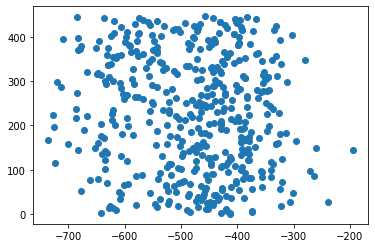

In [4]:
#visulizing the dataset
plt.scatter(df['mfcc1'],df['label'])
#plt.rcParams["figure.figsize"]=(10,6)
plt.show()

In [5]:
#divide the data to training set and test set
x_train,x_test,y_train,y_test=train_test_split(df['mfcc3'],df['label'],test_size=0.20)

In [7]:
#making prediction using sklikit learn library
from sklearn.linear_model import LogisticRegression
#create an instance and fit thr model
lr_model =LogisticRegression()
lr_model.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred=lr_model.predict(x_test.values.reshape(-1,1))

In [9]:
#accuracy
print(f"accuracy={lr_model.score(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1))}")

accuracy=0.0


In [10]:
#accuracy
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       1.0
          36       0.00      0.00      0.00       1.0
          44       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       1.0
          57       0.00      0.00      0.00       0.0
          59       0.00      0.00      0.00       0.0
          63       0.00      0.00      0.00       1.0
          65       0.00      0.00      0.00       1.0
          66       0.00      0.00      0.00       1.0
          69       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
